### [Микроперепись населения - 2015](https://gks.ru/free_doc/new_site/population/demo/micro-perepis/finish/micro-perepis.html)  
#### 1.2. [Население, принявшее участие в микропереписи, по полу, возрастным группам и состоянию в браке (супружеском союзе)](https://gks.ru/free_doc/new_site/population/demo/micro-perepis/finish/01/01-02_(%D0%B0%D0%B1%D1%81).xlsx)
Данные предварительно упрощены для машинного анализа (удалены агрегированные показатели по округам, областям и т.д.)

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
census = pd.read_excel("https://github.com/tadoran/netology_pyda/blob/master/Population%D0%A1ensus2015.xlsx?raw=true")
census["Divorced"] = census["OfficiallyDivorced"]+ census["NonOfficialylDivorced"]
census.head()


,FederalDistrict,Region,CityOrRural,Gender,AgeGroup,TotalRespondents,AnsweredAboutMarriage,DeclinedAbotMarriage,InMarriage,InOfficialMarriage,InNonOfficialMarriage,NeverMarried,OfficiallyDivorced,NonOfficialylDivorced,Widow,Divorced
0,Центральный,Белгородская область,Городское население,Мужчины,16 – 17,144,143,1.0,3.0,3.0,NaN,140.0,NaN,NaN,NaN,NaN
1,Центральный,Белгородская область,Городское население,Мужчины,18 – 19,135,135,NaN,5.0,3.0,2.0,129.0,NaN,1.0,NaN,NaN
2,Центральный,Белгородская область,Городское население,Мужчины,20 – 24,531,531,NaN,115.0,72.0,43.0,411.0,4.0,1.0,NaN,5.0
3,Центральный,Белгородская область,Городское население,Мужчины,25 – 29,725,725,NaN,435.0,367.0,68.0,255.0,23.0,12.0,NaN,35.0
4,Центральный,Белгородская область,Городское население,Мужчины,30 – 34,684,684,NaN,501.0,451.0,50.0,103.0,60.0,18.0,2.0,78.0


In [11]:
by_district_age = census.pivot_table(columns="Gender", index=["AgeGroup"], values="TotalRespondents", aggfunc="sum", fill_value = 0).applymap(int)
by_district_age["FtM_Ratio"] = (by_district_age["Женщины"] / by_district_age["Мужчины"])-1
by_district_age.reset_index(inplace=True)
by_district_age.head()

Gender,AgeGroup,Женщины,Мужчины,FtM_Ratio
0,до 16,32,32,0.000000
1,16 – 17,20394,21280,-0.041635
2,18 – 19,19650,18625,0.055034
3,20 – 24,62335,59827,0.041921
4,25 – 29,91815,89738,0.023145


[Text(0, 0.5, 'Возрастная группа'), Text(0.5, 0, 'Соотношенеи ( ж / м ) - 1')]

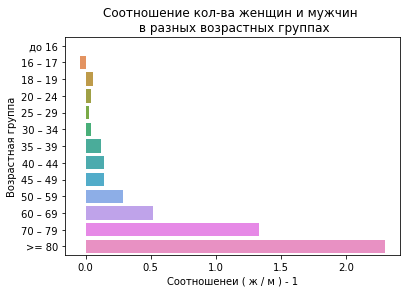

In [4]:
g = sns.barplot(y="AgeGroup",x="FtM_Ratio",  data=by_district_age)
g.set_title("Соотношение кол-ва женщин и мужчин \n в разных возрастных группах")
g.set(xlabel='Соотношенеи ( ж / м ) - 1', ylabel="Возрастная группа")

В графике участвуют переменные возрастная группа (категориальная переменная), и FtM_Ratio (соотношение кол-ва женщин к мужчинам).  
Задача графика - продемонстрировать неравномерность распределения в разных возрастных группах.



In [5]:
by_gender_age = census.pivot_table(columns=["Gender"], index = ["AgeGroup"], 
                                   values="TotalRespondents", aggfunc="sum")
by_gender_age

Gender,Женщины,Мужчины
AgeGroup,,
до 16,32,32
16 – 17,20394,21280
18 – 19,19650,18625
20 – 24,62335,59827
25 – 29,91815,89738
30 – 34,90924,87215
35 – 39,87902,78813
40 – 44,83339,72834
45 – 49,76857,67158


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1cecd9fdd8>,
      dtype=object)

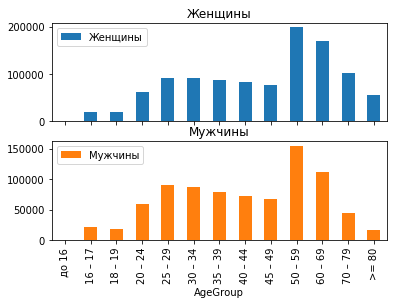

In [6]:
by_gender_age.plot(kind="bar",subplots =True)

В графике представлены категориальные переменные - пол, возрастная группа (показаны на отдельных графиках). Задача - показать, что количество респондентов женщин и мужчин сходно. В то же время, количество респондентов-мужчин в старших группах ниже.
Большое количество респондентов в возрастных группах 50+ может также свидетельствовать об особенности сбора данных в сете (вероятно опрос проводился поквартирным обходом днем, когда многие люди работают).

In [7]:
by_location = census.pivot_table(columns=["CityOrRural"], index = ["AgeGroup"], 
                                 values="TotalRespondents", aggfunc="sum")
by_location

CityOrRural,Городское население,Сельское население
AgeGroup,,
до 16,52,12
16 – 17,26770,14904
18 – 19,25899,12376
20 – 24,84684,37478
25 – 29,129545,52008
30 – 34,127373,50766
35 – 39,117711,49004
40 – 44,107623,48550
45 – 49,95142,48873


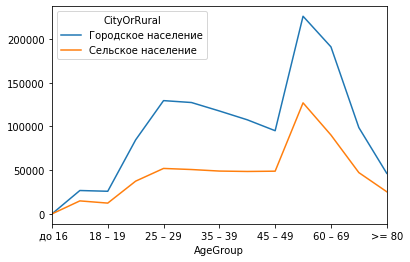

In [8]:
by_location.plot(kind="line")

In [9]:
heat_map = census.groupby(["AgeGroup","CityOrRural"]).sum().loc[:,["NeverMarried","InMarriage","Divorced","Widow"]].dropna()
heat_map.head()

NeverMarried  InMarriage  Divorced  Widow
AgeGroup CityOrRural                                                   
 до 16   Городское население           0.0        50.0       0.0    0.0
         Сельское население            0.0        11.0       0.0    0.0
16 – 17  Городское население       26033.0       472.0       2.0    6.0
         Сельское население        14515.0       268.0       0.0    4.0
18 – 19  Городское население       23358.0      2372.0      19.0   11.0

In [45]:
heat_map.unstack(level=1)


NeverMarried  ...              Widow
CityOrRural Городское население  ... Сельское население
AgeGroup                         ...                   
 до 16                      0.0  ...                0.0
16 – 17                 26033.0  ...                4.0
18 – 19                 23358.0  ...                6.0
20 – 24                 53900.0  ...               64.0
25 – 29                 40480.0  ...              228.0
30 – 34                 21412.0  ...              448.0
35 – 39                 13009.0  ...              870.0
40 – 44                  8621.0  ...             1462.0
45 – 49                  5427.0  ...             2582.0
50 – 59                  8788.0  ...            13775.0
60 – 69                  5189.0  ...            22161.0
70 – 79                  1854.0  ...            25486.0
>= 80                    1020.0  ...            19096.0

[13 rows x 8 columns]

KeyError: ignored

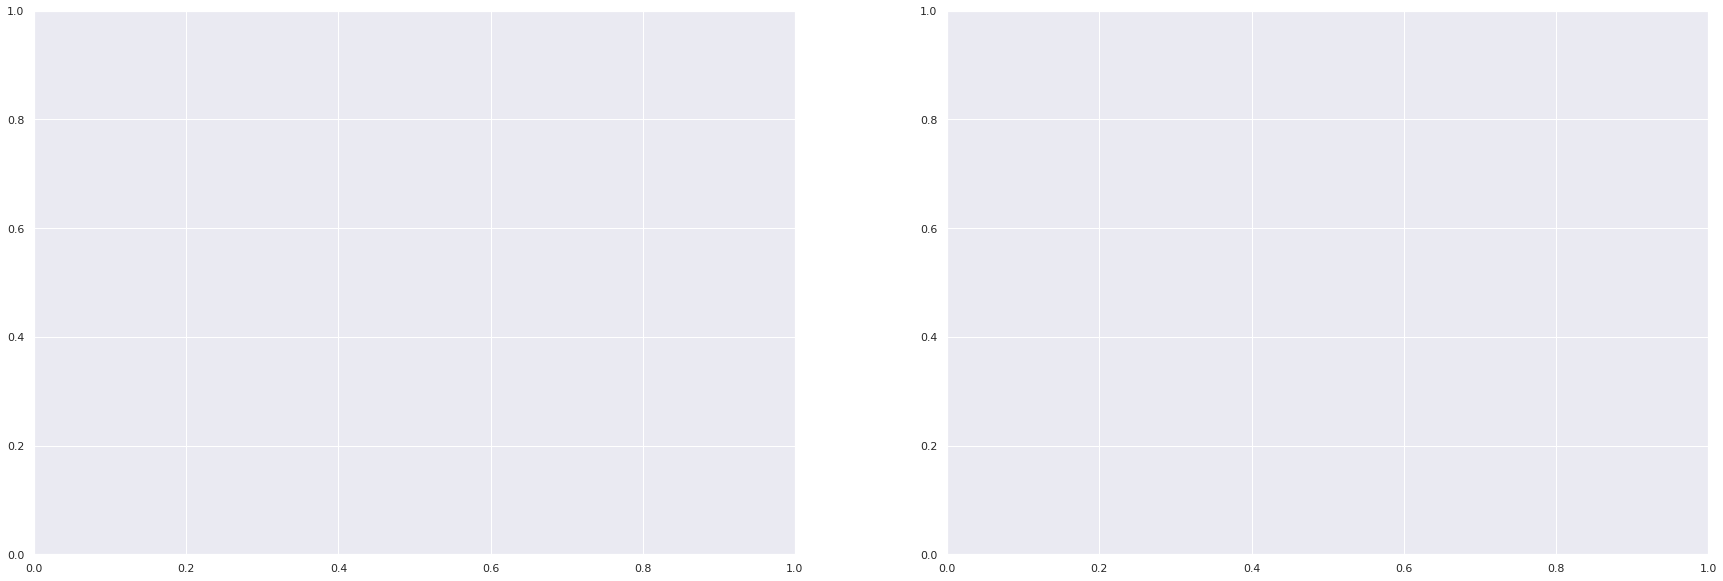

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 10), sharex=True, sharey=False)
city_population  = heat_map.reset_index()[heat_map["CityOrRural"] == "Городское население"]
rural_population = heat_map.reset_index()[heat_map["CityOrRural"] == "Сельское население" ]

city_population.plot(kind= 'bar', rot=45, stacked=True, orientation="vertical", ax=axes[0], title="Городское население")
rural_population.plot(kind='bar', rot=45, stacked=True, orientation="vertical", ax=axes[1], title="Сельское население" )
axes[0].xaxis.set_major_formatter(plt.FixedFormatter(heat_map["AgeGroup"].unique()))

На графике приведены данные о семейном положении в зависимости от возрастной группы - отдельно для городского и сельского населения.  
Видно, что данные по семейному статусу похожи в обеих группах. В то же время, количество разведенных респондентов несколько ниже в группе сельского населения.


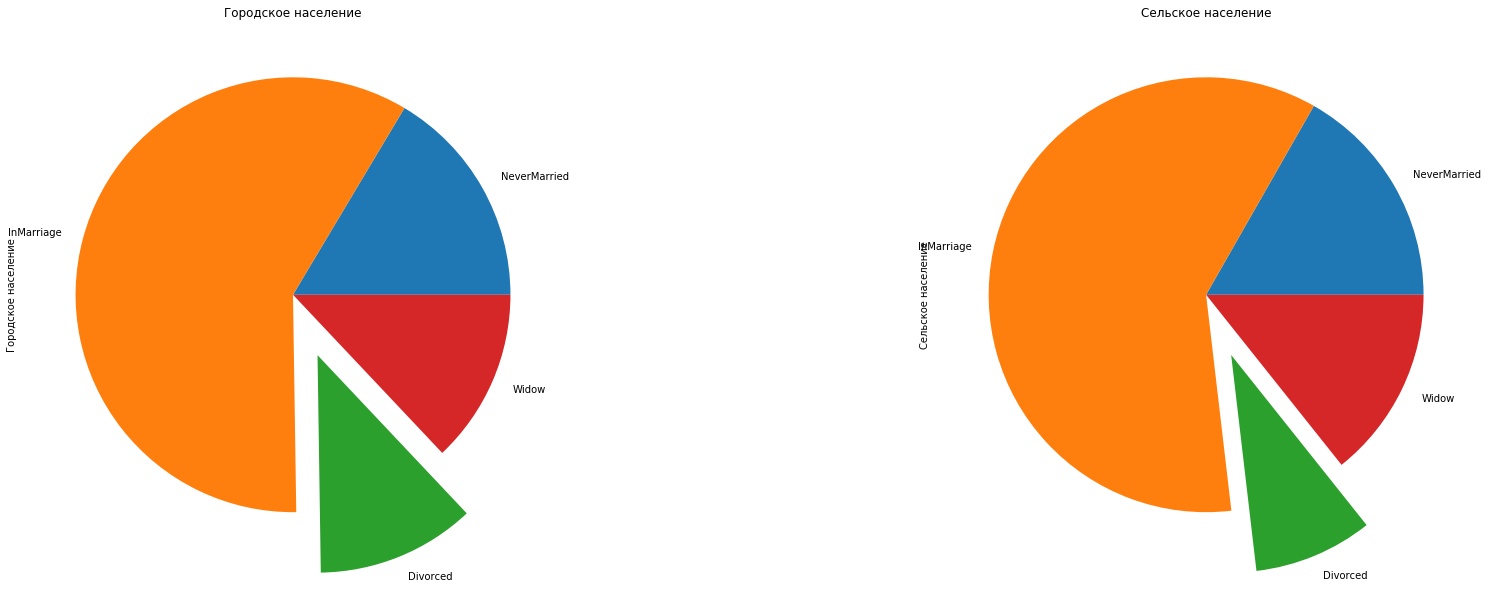

In [12]:
divorsed = heat_map.groupby('CityOrRural').sum()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 10), sharex=True)
divorsed.loc["Городское население"].plot(kind='pie', ax=axes[0], title="Городское население", explode=[0,0,0.3,0])
divorsed.loc[ "Сельское население"].plot(kind='pie', ax=axes[1], title="Сельское население" , explode=[0,0,0.3,0])

На графике представлены данные о семейном положении респондентов в зависимости от возрастной группы.  
Т.к в исходных данных возрастные категории предопрелены - можно либо их экстраполировать, либо использовать как категориальные.  
Можно увидеть, что количество респондентов, которые еще не были в браке максимально в возрасте до 24 лет. В дальнейшем количество респондентов в браке выше, чем в нем не состоящих.
В старшей возрастной группе растет количество вдов и вдовцов. В итоге, в возрастной группе 80+ более половины респондентов пережили своих супругов.

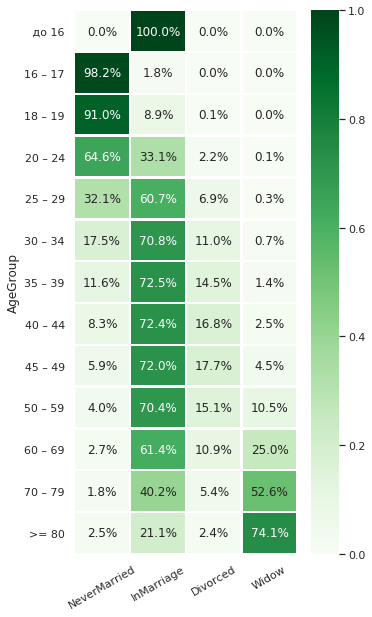

In [17]:
sns.set()

columns_order = ["NeverMarried", "InMarriage", "Divorced", "Widow"]
# % статуса брака от всех в каждой возрастной группе
status_percent = census.pivot_table(index="AgeGroup", values=columns_order, aggfunc="sum").apply(lambda x: x / sum(x), axis=1).reindex(columns_order, axis=1)

# Heatmap с подписями данных по центру
f, ax = plt.subplots(figsize=(5, 10))
sns.heatmap(status_percent, annot=True, fmt="2.1%", linewidths=1.5, ax=ax, cmap="Greens")
plt.yticks(rotation=0)
plt.xticks(rotation=30)

# A dirty hack from https://github.com/mwaskom/seaborn/issues/1773#issuecomment-546466986
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

На данном графике так же, как и на предыдущем, представлены данные о семейном положении в разных возрастных группах.
